<a href="https://colab.research.google.com/github/atakishiyevamalak/MachineLearningProjects/blob/main/Exploratory_Data_Analysis_of_the_London_Bike_Sharing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!/bin/bash
!curl -L -o london-bike-sharing-dataset.zip https://www.kaggle.com/api/v1/datasets/download/hmavrodiev/london-bike-sharing-dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  165k  100  165k    0     0   300k      0 --:--:-- --:--:-- --:--:--  300k


In [ ]:
from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
with ZipFile('/content/london-bike-sharing-dataset.zip', 'r') as  f:
  f.extractall()

In [ ]:
df = pd.read_csv('/content/london_merged.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [ ]:
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour

In [ ]:
df.drop(['timestamp'], axis=1, inplace=True)

In [ ]:
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,0
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,1
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,2
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,3
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,3,19
17410,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,3,20
17411,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,3,21
17412,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,2017,1,3,22


In [ ]:
df.isna().sum()

,0
cnt,0
t1,0
t2,0
hum,0
wind_speed,0
weather_code,0
is_holiday,0
is_weekend,0
season,0
year,0


In [ ]:
annual_sales = df.groupby('year')['cnt'].sum().reset_index()
annual_sales

,year,cnt
0,2015,9738746
1,2016,10129546
2,2017,37680


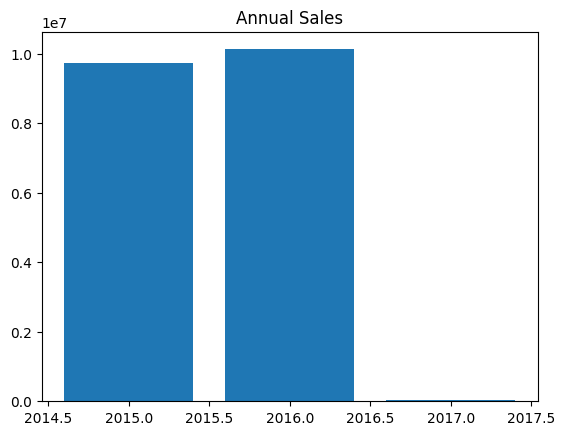

In [ ]:
plt.title('Annual Sales')
plt.bar(annual_sales['year'], annual_sales['cnt']);

In [ ]:
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,0
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,1
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,2
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,3
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,3,19
17410,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,3,20
17411,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,3,21
17412,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,2017,1,3,22


In [ ]:
seasonal_sales = df.groupby('season')['cnt'].mean().reset_index()
seasonal_sales['season'][seasonal_sales['season'] == 0.0] = 'spring'
seasonal_sales['season'][seasonal_sales['season'] == 1.0] = 'summer'
seasonal_sales['season'][seasonal_sales['season'] == 2.0] = 'fall'
seasonal_sales['season'][seasonal_sales['season'] == 3.0] = 'winter'

/tmp/ipython-input-1830778329.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  seasonal_sales['season'][seasonal_sales['season'] == 0.0] = 'spring'
/tmp/ipython-input-1830778329.py:2: FutureWarning: Setting an item of incompatible dtype i

<BarContainer object of 4 artists>

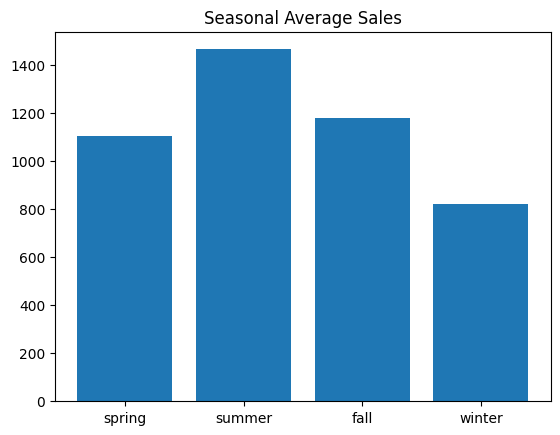

In [ ]:
plt.title("Seasonal Average Sales")
plt.bar(seasonal_sales['season'], seasonal_sales['cnt'])

In [ ]:
monthly_sales = df.groupby('month')['cnt'].sum().reset_index()
monthly_sales

,month,cnt
0,1,1166837
1,2,1136504
2,3,1352461
3,4,1600427
4,5,1897348
5,6,1967130
6,7,2286214
7,8,2171265
8,9,1891097
9,10,1800752


<BarContainer object of 12 artists>

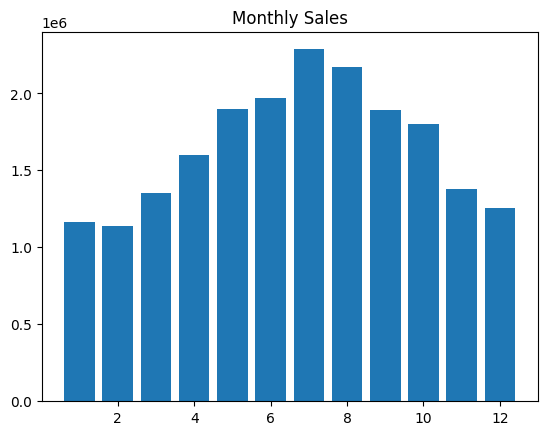

In [ ]:
plt.title("Monthly Sales")
plt.bar(monthly_sales['month'], monthly_sales['cnt'])

In [ ]:
sales_by_days = df.groupby('day')['cnt'].sum().reset_index()
sales_by_days

,day,cnt
0,1,619537
1,2,600641
2,3,635968
3,4,658083
4,5,652522
5,6,697667
6,7,684249
7,8,696937
8,9,725225
9,10,665536


<BarContainer object of 31 artists>

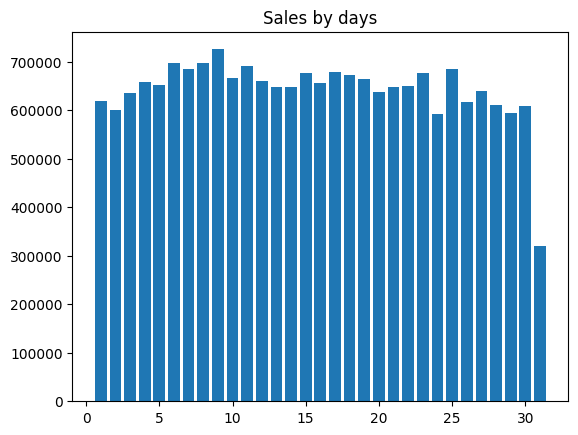

In [ ]:
plt.title("Sales by days")
plt.bar(sales_by_days['day'], sales_by_days['cnt'])

In [ ]:
sales_by_hours = df.groupby('hour')['cnt'].sum().reset_index()
sales_by_hours

,hour,cnt
0,0,210401
1,1,145257
2,2,98275
3,3,67951
4,4,52859
5,5,79820
6,6,338771
7,7,1066309
8,8,2087164
9,9,1201745


<BarContainer object of 24 artists>

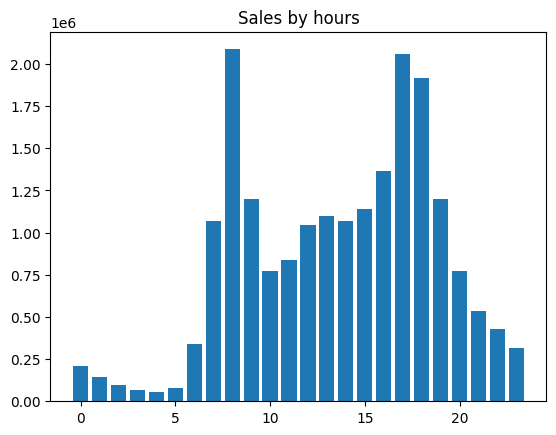

In [ ]:
plt.title("Sales by hours")
plt.bar(sales_by_hours['hour'], sales_by_hours['cnt'])

In [ ]:
df_weekday = df[df['is_weekend'] == 0]
df_weekend = df[df['is_weekend'] == 1]

In [ ]:
weekday_hours = df_weekday.groupby('hour')['cnt'].sum().reset_index()
weekend_hours = df_weekend.groupby('hour')['cnt'].sum().reset_index()

<BarContainer object of 24 artists>

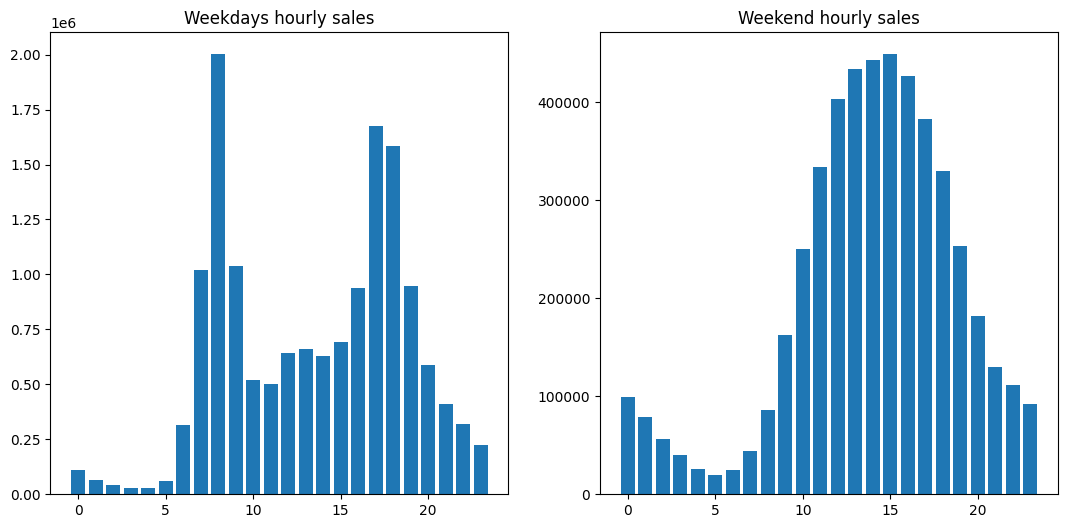

In [ ]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.title('Weekdays hourly sales')
plt.bar(weekday_hours['hour'], weekday_hours['cnt'])
plt.subplot(122)
plt.title('Weekend hourly sales')
plt.bar(weekend_hours['hour'], weekend_hours['cnt'])

In [ ]:
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,0
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,1
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,2
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,3
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,3,19
17410,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,3,20
17411,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,3,21
17412,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,2017,1,3,22


In [ ]:
df['wind_speed'].describe()

,wind_speed
count,17414.000000
mean,15.913063
std,7.894570
min,0.000000
25%,10.000000
50%,15.000000
75%,20.500000
max,56.500000


In [ ]:
df['wind_speed']

,wind_speed
0,6.0
1,5.0
2,0.0
3,0.0
4,6.5
...,...
17409,19.0
17410,21.0
17411,24.0
17412,23.0


In [ ]:
df['wind_speed'] =pd.cut(df['wind_speed'], bins=[-1, 10, 20, 30, 40, 60], labels=['low', 'slight', 'moderate', 'high', 'catastrophic'])

In [ ]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,low,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,low,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,low,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,low,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,low,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,slight,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,moderate,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,moderate,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,moderate,4.0,0.0,0.0,3.0


In [ ]:
wind_speed_gr = df.groupby('wind_speed')['cnt'].sum().reset_index()
wind_speed_gr

/tmp/ipython-input-176748817.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_speed_gr = df.groupby('wind_speed')['cnt'].sum().reset_index()


,wind_speed,cnt
0,low,4386543
1,slight,9553381
2,moderate,4999893
3,high,874750
4,catastrophic,88195


<BarContainer object of 5 artists>

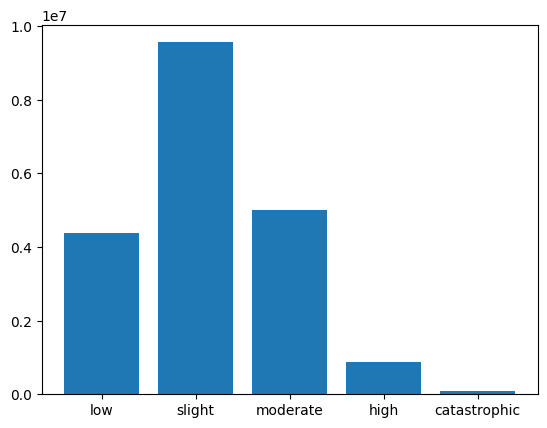

In [ ]:
plt.bar(wind_speed_gr['wind_speed'], wind_speed_gr['cnt'])